# Problem 1: 3-layer MLP to fit a univariate function

Modified `threelayerSGD.py`

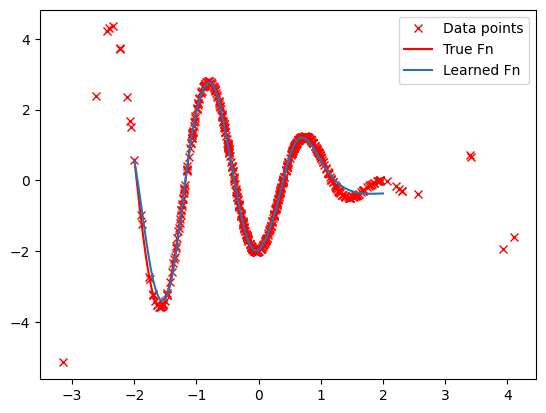

In [5]:
from itertools import cycle
import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

alpha = 0.1
K = 1000
B = 128
N = 512

def f_true(x) :
    return (x-2) * np.cos(x*4)

torch.manual_seed(0)
X_train = torch.normal(0.0, 1.0, (N,))
y_train = f_true(X_train)
X_val = torch.normal(0.0, 1.0, (N//5,))
y_val = f_true(X_val)

train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B)
test_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=B)

def loss(pred_Y, Y):
    diff = pred_Y - Y
    return torch.mean(diff * diff / 2)

# loss = nn.MSELoss()

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 64)
        self.l2 = nn.Linear(64, 64)
        self.l3 = nn.Linear(64, 1)
    def forward(self, x):
        x = x.view(-1, 1)
        x = F.sigmoid(self.l1(x))
        x = F.sigmoid(self.l2(x))
        return self.l3(x)
        
        
model = MLP()

layers = [model.l1, model.l2, model.l3]
for layer in layers:
    layer.weight.data = torch.normal(0, 1, layer.weight.shape)
    layer.bias.data = torch.full(layer.bias.shape, 0.03)

optimizer = optim.SGD(params=model.parameters(), lr=1e-3)
for epoch in range(1, K+1):
    for X, y in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss(model(X), y)
        train_loss.backward()
        optimizer.step()

with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'r',label='True Fn')
    plt.plot(xx, model(xx),label='Learned Fn')
plt.legend()
plt.show()


# Problem 2: Deep Learning Operates under p >> N.

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [5]:
model = MLP()
cnt = 0
for param in model.parameters():
  cnt += param.numel()
print("Total parameters count:", cnt)

Total parameters count: 4353


위에서 구한 파라미터 개수인 4353개는 $(64+64)+(64^2+64)+(64+1)$로 계산된 값과 일치하는 것을 확인할 수 있다. 이는 우리가 사용하는 데이터 점의 수인 512개보다 훨씬 많은 수임을 확인할 수 있다.

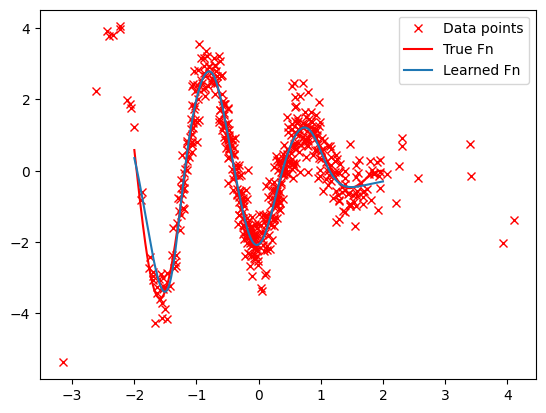

In [6]:
from itertools import cycle
import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

alpha = 0.1
K = 1000
B = 128
N = 512

def f_true(x) :
    return (x-2) * np.cos(x*4)

torch.manual_seed(0)
X_train = torch.normal(0.0, 1.0, (N,))
y_train = f_true(X_train) + torch.normal(0, 0.5, X_train.shape) # f_true(X_train)
X_val = torch.normal(0.0, 1.0, (N//5,))
y_val = f_true(X_val)

train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B)
test_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=B)

def loss(pred_Y, Y):
    diff = pred_Y - Y
    return torch.mean(diff * diff / 2)

# loss = nn.MSELoss()

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 64)
        self.l2 = nn.Linear(64, 64)
        self.l3 = nn.Linear(64, 1)
    def forward(self, x):
        x = x.view(-1, 1)
        x = F.sigmoid(self.l1(x))
        x = F.sigmoid(self.l2(x))
        return self.l3(x)
        
        
model = MLP()

layers = [model.l1, model.l2, model.l3]
for layer in layers:
    layer.weight.data = torch.normal(0, 1, layer.weight.shape)
    layer.bias.data = torch.full(layer.bias.shape, 0.03)

optimizer = optim.SGD(params=model.parameters(), lr=1e-3)
for epoch in range(1, K+1):
    for X, y in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss(model(X), y)
        train_loss.backward()
        optimizer.step()

with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'r',label='True Fn')
    plt.plot(xx, model(xx),label='Learned Fn')
plt.legend()
plt.show()


결과가 거의 변하지 않았다

# Problem 3: Basic properties of the CE loss.

![](https://cdn.discordapp.com/attachments/947918193924636695/1219496910184910848/Screenshot_20240319_130410.jpg?ex=660b8400&is=65f90f00&hm=8f837741df978659ce385d131e5e32d82d2fd6a7704921ac5f6fd9893bcb08dd&)

# Problem 4: Derivative of max

![](https://cdn.discordapp.com/attachments/947918193924636695/1219496910503673896/Screenshot_20240319_130424.jpg?ex=660b8400&is=65f90f00&hm=b968986a1a3527f3d7021a47bb7bb1c349cb845fb2835a9a1c8a1e979bca425a&)

# Problem 5: Basic properties of activation functions

![](https://cdn.discordapp.com/attachments/947918193924636695/1219496910809727036/Screenshot_20240319_130441.jpg?ex=660b8400&is=65f90f00&hm=7ebde8893fc19ad57ddc7f09d0534c35ccceb176df3cb5210b4977eac1a95feb&)

# Problem 6: Vanishing gradients

![](https://cdn.discordapp.com/attachments/947918193924636695/1219496911107653662/Screenshot_20240319_130455.jpg?ex=660b8400&is=65f90f00&hm=05fb29f8d313ea6628a8bf85be88f0e5c0c0a2a7cee963a1e54a4d514fa36c37&)

# Problem 7: Leaky ReLU

![](https://cdn.discordapp.com/attachments/947918193924636695/1219496911354986506/Screenshot_20240319_130504.jpg?ex=660b8400&is=65f90f00&hm=c6e2f5f8cb783f9dc15a8750696250f3c0b61e50a1c1d66cf137e4a1a67106a0&)